In [34]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [35]:
from sklearn.datasets import load_wine
df = load_wine()

In [36]:
df = pd.DataFrame(data=np.c_[df['data'],df['target']], columns=df['feature_names']+['target'])

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [37]:
df['target'].values

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2.])

In [38]:
df.isnull().any()

alcohol                         False
malic_acid                      False
ash                             False
alcalinity_of_ash               False
magnesium                       False
total_phenols                   False
flavanoids                      False
nonflavanoid_phenols            False
proanthocyanins                 False
color_intensity                 False
hue                             False
od280/od315_of_diluted_wines    False
proline                         False
target                          False
dtype: bool

In [39]:
df.shape
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

In [40]:
x = df.drop(['target'],axis=1)
y = df['target']

In [41]:
x.shape
y.shape

(178,)

In [42]:
x.head

<bound method NDFrame.head of      alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonf

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [44]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2, random_state=50)
model_no_scaling = KNeighborsClassifier(n_neighbors=5)
model_no_scaling.fit(X_train, Y_train)
model_no_scaling.score(X_test, Y_test)

0.6666666666666666

In [45]:
print("The Training Accuracy is :{}".format(model_no_scaling.score(X_train, Y_train)))
print("The Testing Accuracy is :{}".format(model_no_scaling.score(X_test,Y_test)))

The Training Accuracy is :0.7887323943661971
The Testing Accuracy is :0.6666666666666666


In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled=scaler.fit_transform(x)
X_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [47]:
X_scaled_train,X_scaled_test,Y_train,Y_test = train_test_split(X_scaled,y,test_size = 0.2, random_state=50)
model_with_scaling = KNeighborsClassifier(n_neighbors=5)
model_with_scaling.fit(X_scaled_train,Y_train)
model_with_scaling.score(X_scaled_test,Y_test)

0.9444444444444444

In [48]:
print("TRAIN ACCURACY : {}".format(model_with_scaling.score(X_scaled_train,Y_train)))
print("TEST ACCURACY : {}".format(model_with_scaling.score(X_scaled_test,Y_test)))

TRAIN ACCURACY : 0.9929577464788732
TEST ACCURACY : 0.9444444444444444


In [49]:
#Accuracy increases by 20% so we can conclude scaling data can increase accuracy.

In [50]:
#IMPACT OF K VALUE ON ACCURACY

In [51]:
k = np.arange(1, 100, 1)
score_values=[]
for i in k:
    model_with_scaling = KNeighborsClassifier(n_neighbors=i)
    model_with_scaling.fit(X_scaled_train,Y_train)
    score_values.append(model_with_scaling.score(X_scaled_test,Y_test))
    
score_values[:10]   

[0.9444444444444444,
 0.9444444444444444,
 0.9444444444444444,
 0.9444444444444444,
 0.9444444444444444,
 0.9444444444444444,
 0.9444444444444444,
 0.9722222222222222,
 0.9722222222222222,
 0.9722222222222222]

In [52]:
score_array = np.array(score_values,dtype="float32")

Text(0, 0.5, 'Accuracy')

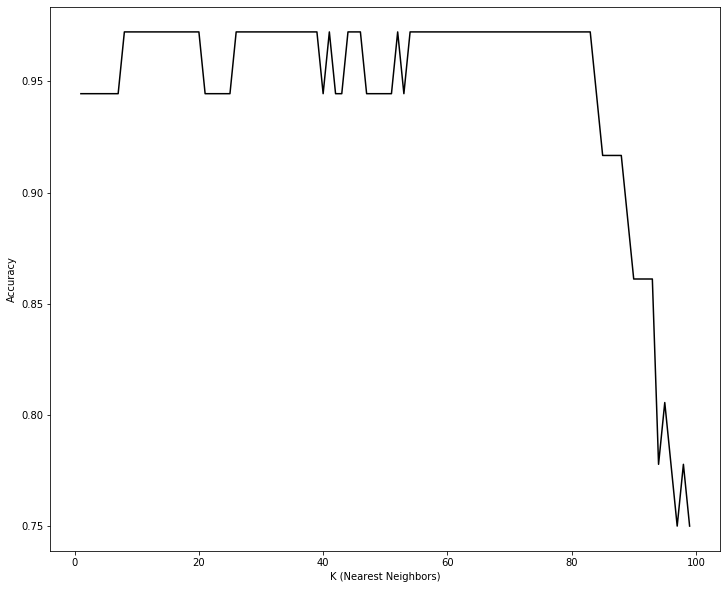

In [53]:
# Visualization of Accuracy of model according to k values
plt.figure(figsize=(12,10))
plt.plot(k,score_array,c='black')
plt.xlabel("K (Nearest Neighbors)")
plt.ylabel("Accuracy")

In [54]:
#Impact of reducing/increasing training data on accuracy
#We used a ratio of 80:20 in the before model now lets train data with different ratio.

In [55]:
r = np.arange(0.1,1,0.1)
score_impact =[]
for i in r :
    X_train_change,X_test_change,Y_train_change,Y_test_change = train_test_split(X_scaled,y,test_size=0.3,random_state=50)
    
    model_with_scaling = KNeighborsClassifier(n_neighbors=5)
    model_with_scaling.fit(X_scaled_train, Y_train)
    
    score_impact.append(model_with_scaling.score(X_test_change, Y_test_change))
    
score_impact

[0.9629629629629629,
 0.9629629629629629,
 0.9629629629629629,
 0.9629629629629629,
 0.9629629629629629,
 0.9629629629629629,
 0.9629629629629629,
 0.9629629629629629,
 0.9629629629629629]

In [56]:
score_change_array = np.array(score_impact, dtype="float32")
score_change_array

array([0.962963, 0.962963, 0.962963, 0.962963, 0.962963, 0.962963,
       0.962963, 0.962963, 0.962963], dtype=float32)

Text(0, 0.5, 'Accuracy')

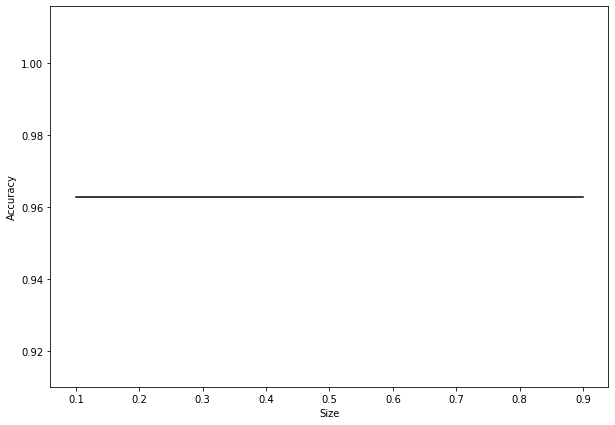

In [57]:
# Visualization of Accuracy of model
plt.figure(figsize=(10,7))
plt.plot(r,score_change_array, c='black')
plt.xlabel("Size")
plt.ylabel("Accuracy")

In [58]:
#Any one approach of analyzing the performance of KNN based on the vide for this we will be using one feature column to explain the performance of KNN algorithm.

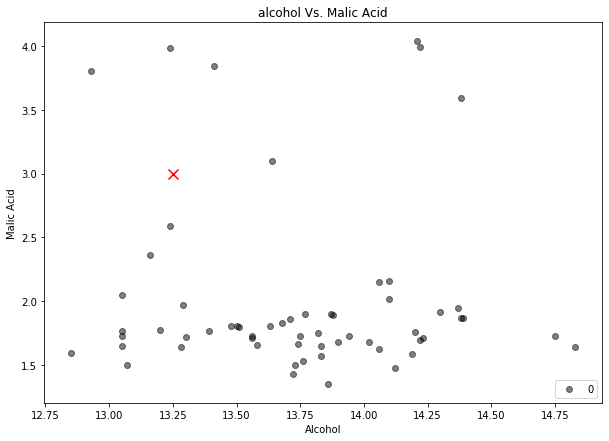

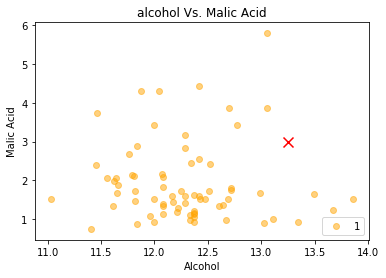

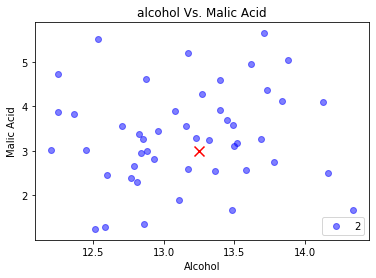

In [59]:
colours = ['black','orange','blue']
species = [0,1,2]

plt.figure(figsize=(10,7))
for i in range(0,3):
    species_df = df[df['target']== species[i]]
    plt.scatter(
        species_df['alcohol'],
        species_df['malic_acid'],
        color=colours[i],
        alpha=0.5,
        label=species[i]
    )
    plt.scatter(13.25,3,c="red",marker="x",s=100)
    plt.xlabel('Alcohol')
    plt.ylabel('Malic Acid')
    plt.title('alcohol Vs. Malic Acid')
    plt.legend(loc='lower right')
    
    plt.show()

In [60]:
from sklearn.dummy import DummyClassifier

model_dummy = DummyClassifier(strategy="uniform")
model_dummy.fit(X_train,Y_train)
model_dummy.score(X_test,Y_test)

0.2777777777777778

In [61]:
print("TRAIN ACCURACY  : {}".format(model_dummy.score(X_train,Y_train)))
print("TEST ACCURACY  : {}".format(model_dummy.score(X_test,Y_test)))

TRAIN ACCURACY  : 0.38028169014084506
TEST ACCURACY  : 0.25
